#8.1 합성곱 신경망(CNN)의 구성 요소

**합성곱**

- 마치 도장을 찍어서 유용한 특성만 드러나게 하는 것
- 입력데이터의 일부에 가중치를 곱한다
- 뉴런 == 필터 == 커널 ( 도장 )
    - 필터는 뉴런의 갯수를 표현할 때 사용함
- 합성곱 층의 뉴런의 가중치 갯수는 정하기 나름.. -> 하이퍼 파라미터
- 커널이 왼쪽에서 오른쪽으로 , 위에서 아래로 움직이면서 출력을 만들어낸다..
- 그 합성곱 계산을 통해 얻은 출력을 **특성 맵**이라고 한다
- 여러개의 뉴런을 이용하듯이 여러개의 커널을 이용할 수 있다..
- 그럼 특성맵이 여러개 나오는데, 이 특성맵들은 차곡차곡 쌓인다.


**케라스 합성곱 층**

합성곱 층은 Conv2D클래스로 제공한다.

Conv2D(필터의 갯수, (커널의 크기), 활성화함수..)

커널의 크기는 보통 (3,3), (5,5)권장

In [ ]:
#합성곱 층 생성..
"""
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation = 'relu')
"""

"\nfrom tensorflow import keras\nkeras.layers.Conv2D(10, kernel_size=(3,3), activation = 'relu')\n"

합성곱 신경망

    - 1개 이상의 합성곱 층을 쓴 인공 신경망

**패딩과 스트라이드**

패딩

    - 입력 배열의 주위를 가상의 원소로 채우는 것
    - 패딩은 0으로 채움
    - 세임패딩 : 입력과 특성맵의 크기를 같게 만들어주는 패딩..(주위에 한겹을 0으로 만듦)
    - 밸리드 패딩 : 순수한 입력 배열에 합성곱을 함..

패딩의 이유

    - 이미지의 주변에 있는 정보를 잃어버리지 않도록 도와줌..
    - 원래 주변은 도장이 한번만 찍혀서 정보가 중앙에 비해서 누락됨..

**스트라이드**

    - 합성곱 연산이 몇칸씩 이동하는지 결정하는 매개변수
    - 기본값 1칸씩..

In [ ]:
#패딩과 스트라이드 변수지정
"""
keras.layers.Conv2D(10,kernel_size=(3,3), activation='relu', padding='same', strides = 1)
보통 기본값으로 함..
"""

"\nkeras.layers.Conv2D(10,kernel_size=(3,3), activation='relu', padding='same', strides = 1)\n보통 기본값으로 함..\n"

**풀링**

합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 함

특성 맵의 갯수는 줄이지 않음

풀링도 합성곱처럼 입력위를 지나가면서 도장을 찍음


1) 최대풀링
    
    - 도장을 찍은 영역에서 최댓값을 고름

2) 평균 풀링

    - 도장을 찍은 영역에서 평균을 계산함
    - 특성 맵의 중요한 정보를 평균하여 희석시킬 수 있기 때문에 잘 안함

풀링은 가중치가 없고 풀링크기와 스트라이드가 같다

패딩은 없다

MaxPooling2D() 클래스로 풀링을 할 수 있다

In [ ]:
# 풀링 해보자..
"""
keras.layers.MaxPooling2D(2)        : (2,2)풀링..
keras.layers.MaxPooling2D(2, strides = 2, padding='valid')      :기본값...
풀링의 크기 (2,3)처럼 지정할 수 있긴 한데 잘 안한다..
"""

"\nkeras.layers.MaxPooling2D(2)        : (2,2)풀링..\nkeras.layers.MaxPooling2D(2, strides = 2, padding='valid')      :기본값...\n풀링의 크기 (2,3)처럼 지정할 수 있긴 한데 잘 안한다..\n"

**합성곱 신경망의 전체 구조**

합성곱 신경망은 일반적으로 이미지(2차원)이다..

1) 합성곱 층

    - 커널의 크기와 커널의 갯수를 지정하고, 패딩과 활성화 함수를 지정한다
    - 커널 마다 특성 맵을 만든다
    - 따로 지정을 하지 않으면 스트라이드는 1

2) 풀링층

    - 가로세로 크기를 줄인다..
    - 보통 (2,2)풀링을 사용해서 절반으로 줄인다
    - 특성 맵 개수는 유지된다

3) 밀집층

    - 풀링층의 출력을 다시 Flatten클래스를 이용해서 1차원으로 펼친다
    - 출력층의 뉴런 갯수(분류하고자 하는 클래스 갯수)를 지정한다
    - 소프트맥스 활성화 함수를 거쳐 최종 예측 확률이 된다

**컬러 이미지를 사용한 합성곱**

- 보통 컬러 이미지면 RGB 세개의 층으로 이미지가 주어지고, 깊이가 3인 입력이다..

- 이런경우에는 커널(도장)의 깊이도 입력과 동일해야 한다

- ex) 입력이 (4,4,3)이면 커널의 크기도 (3,3,3) 이런 식으로 되어야한다

- 기본적으로 2차원과 같지만 깊이만큼 쑥 들어간다고 생각하면 된다.

- 케라스의 합성곱은 사실 항상 입력을 3차원입력을 기대한다.

    - 그래서 입력이 흑백인 경우라도 크기를 (28,28,1)처럼 3차원 배열로 변환해서 전달한다

- 합성곱층 - 풀링층 다음에 다시 합성곱층이 나오면 깊이를 갖는 입력이다..(특성맵의 개수만큼이 깊이임)

- 점점 너비와 높이는 줄어들고 깊이는 깊어지는 것이 특징이다.

- 마지막 출력층 전에 특성 맵을 모두 펼쳐서 밀집층의 입력으로 사용한다

필터는 이미지에 있는 어떤 특징을 찾는다고 생각할 수 있다.

처음에는 간단한 기본적인 특징(직선, 곡선 등)을 찾고 층이 깊어질 수록 다양하고 구체적인 특징을 감지할 수 있도록 필터의 갯수를 늘린다

필터의 갯수 증가 -> 다양하고 구체적인 특징을 감지할 수 있음

#8.2 합성곱 신경망을 사용한 이미지 분류

**패션 MNIST 데이터 불러오기**

갖고와서 스케일링하고 훈련세트와 검증세트 나누기

합성곱 층을 먼저 쓰려면 2차원을 그대로 사용하기 때문에 Flatten 층을 사용할 필요가 없다

항상 깊이 차원이 있어야 하므로 reshape()를 이용해 깊이만 추가해준다

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1)/255.0    #-1은 샘플 갯수는 그대로 한다
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

In [ ]:
print(train_input.shape, train_scaled.shape)

(60000, 28, 28) (48000, 28, 28, 1)


**합성곱 신경망 만들기**

Sequential 클래스의 객체를 만들고 합성곱층 Conv2D를 추가..

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
# 32개의 필터, (3,3)크기의 필터, 세임패딩, 활성화함수 렐루, 들어오는 입력크기 (28,28,1)

In [ ]:
# 풀링층 지정
model.add(keras.layers.MaxPooling2D(2))
#(2,2)최대풀링

#첫번째 합성곱-풀링층의 결과.. (14,14,32) : (2,2)풀링, 32개의 필터

In [ ]:
#두번째 합성곱-풀링층 추가
#입력 : (14,14,32)
model.add(keras.layers.Conv2D(64,kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

#결과 : (7,7,64)

In [ ]:
#그다음 밀집층에 전달.. (은닉층 1개도 생성..)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))
#은닉층 1개, 드롭아웃(과대적합), 마지막 활성화 함수는 소프트맥스(다중분류)

In [ ]:
model.summary()
# 모델 파라미터수
# 첫번째 합성곱-풀링층 : ( 3*3(가중치) + 1(절편) ) * 32(필터갯수) = 320
# 두번째 합성곱-풀링층 : ( 3*3(가중치)*32(커널의 깊이) + 1(절편) ) * 64(필터갯수) = 18496
# 은닉층 : (7*7*64(특성갯수) * 100(종류) + 100(절편)) = 313700
# 출력층 : (100(특정갯수) * 10(클래스) + 10(절편)) = 1010

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

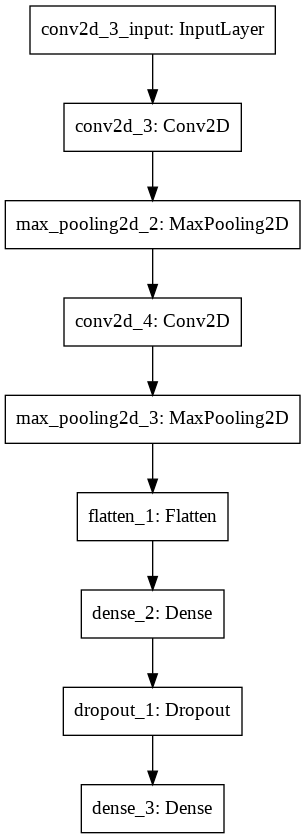

In [ ]:
keras.utils.plot_model(model)
#층의 구성을 그림으로 표현하는 plot_model()

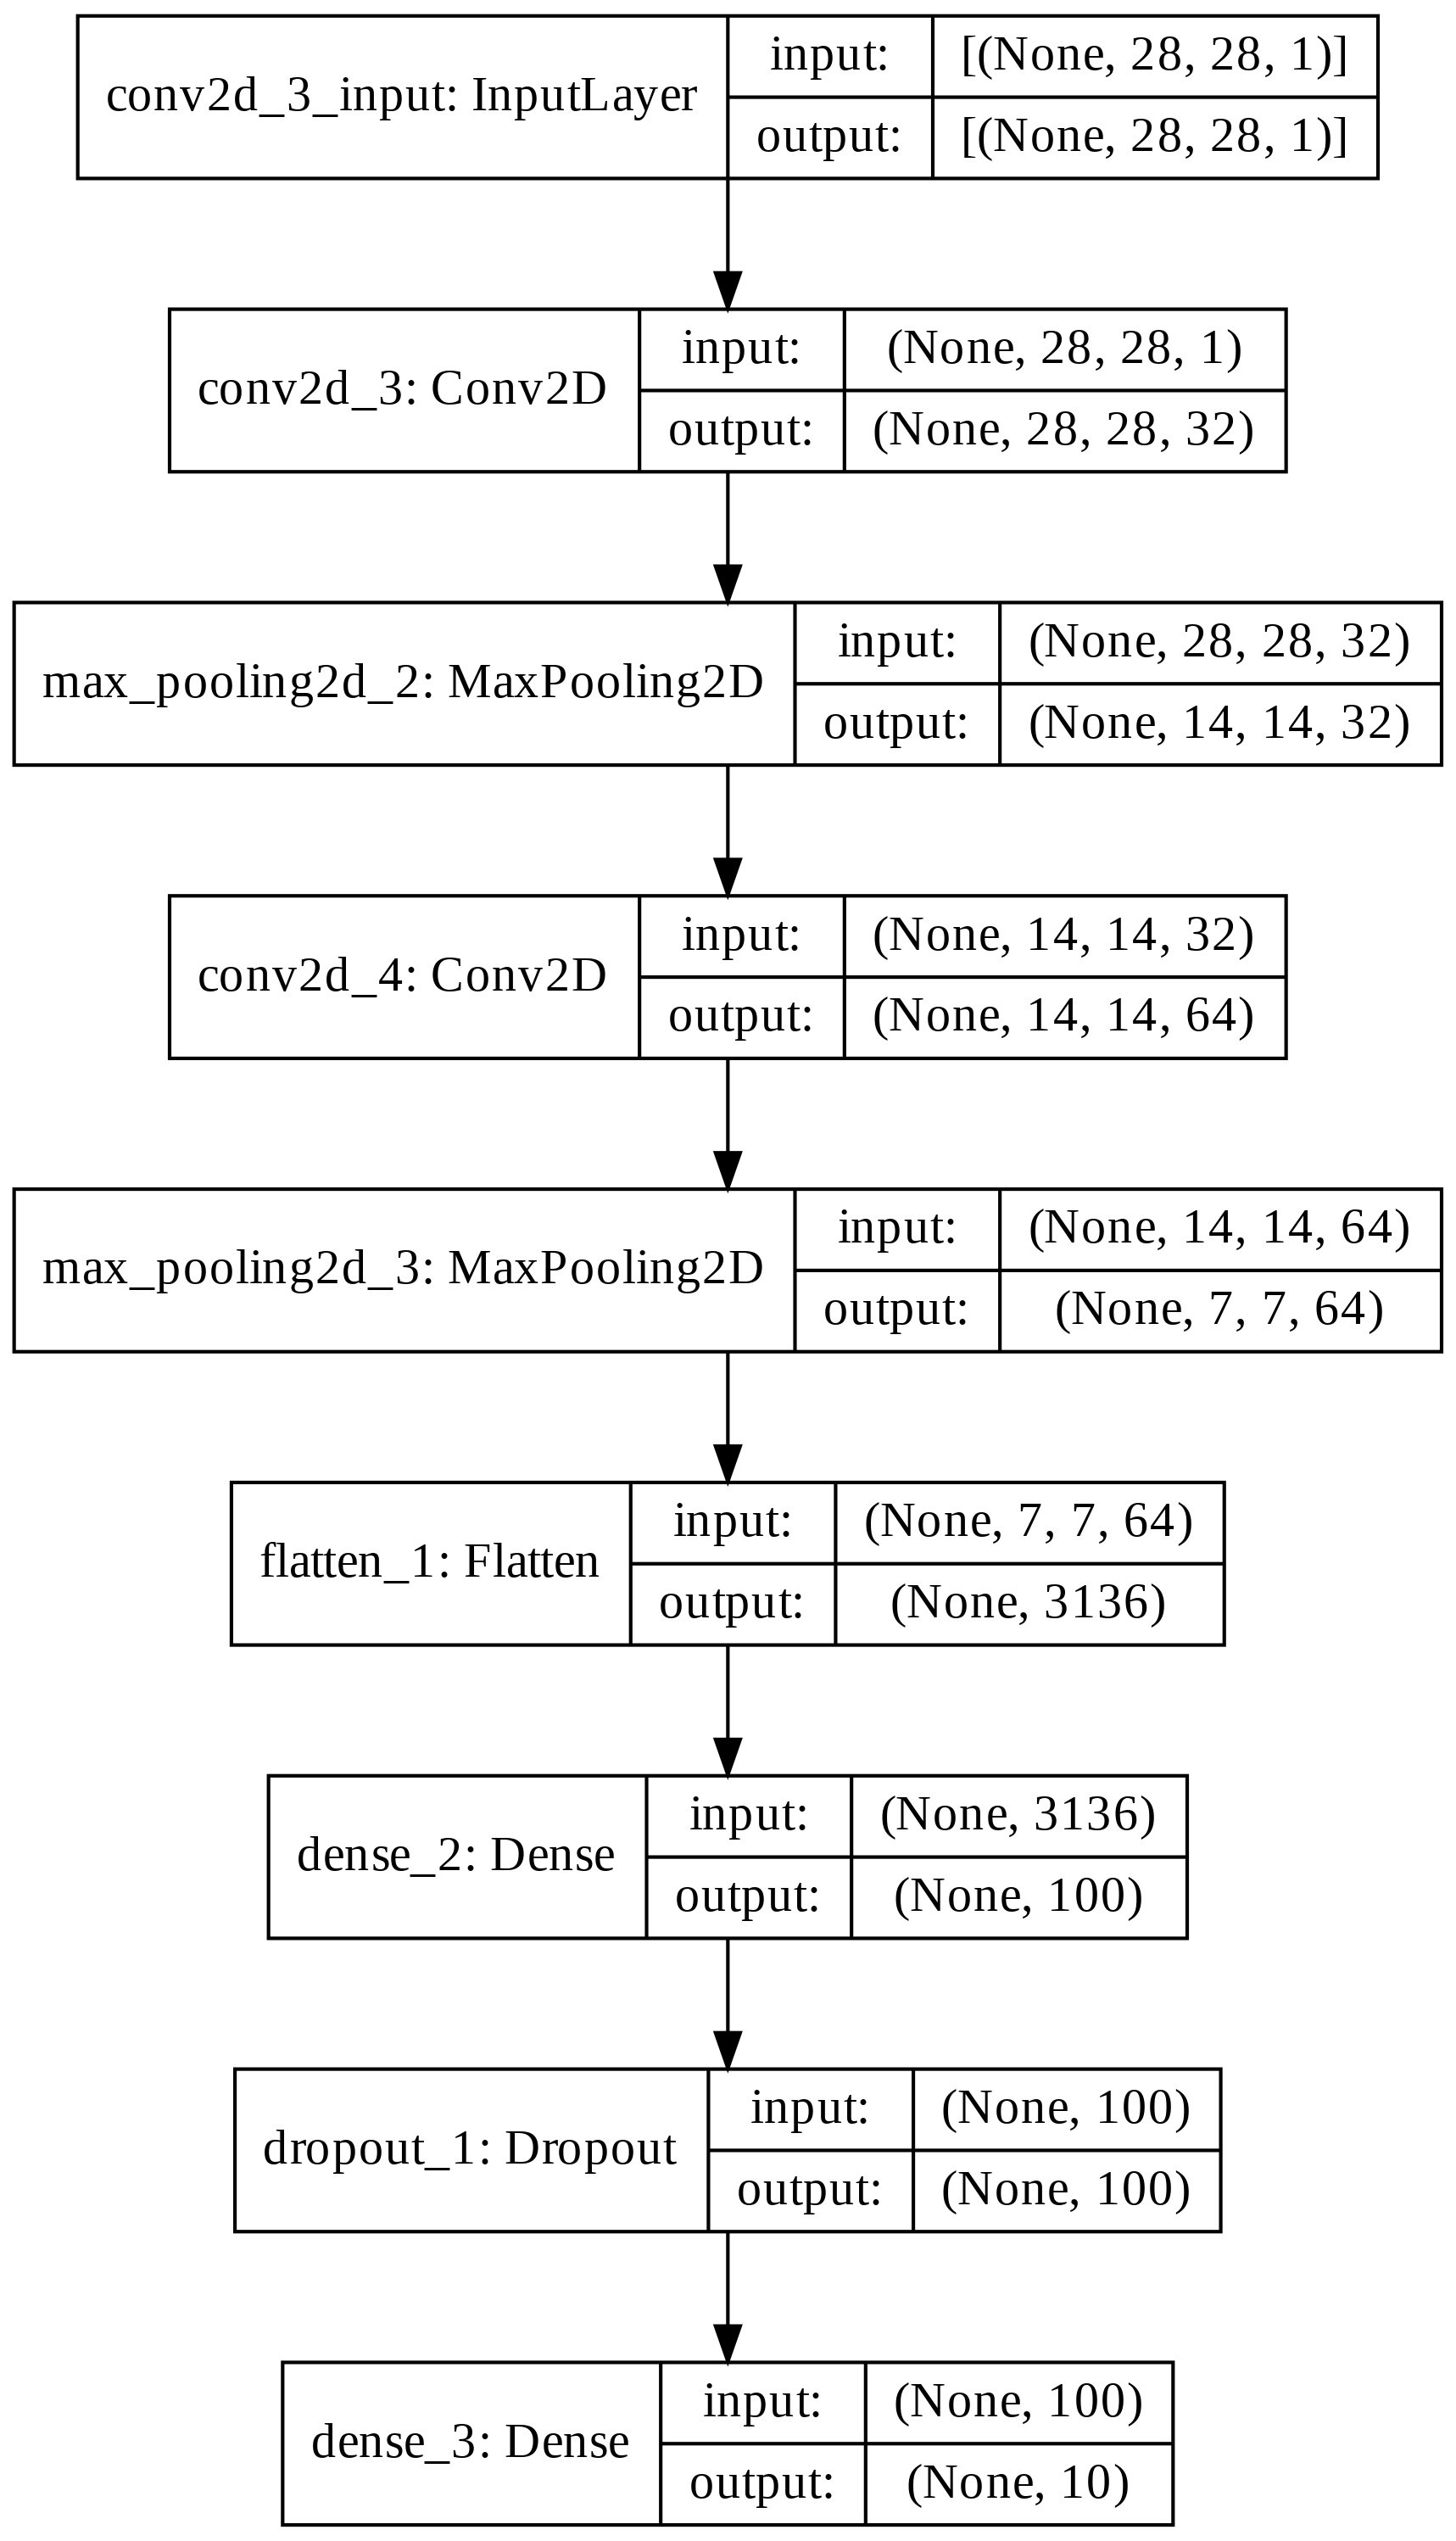

In [ ]:
#to_file 매개변수로 저장도 가능, show_shapes매개변수로 입출력 크기를 표시가능
#dpi 매개변수로 해상도 지정가능
keras.utils.plot_model(model, show_shapes=True, to_file='cnn_architecture.png', dpi=300)

**모델 컴파일과 훈련**

Adam 옵티마이저

ModelCheckpoint, EarlyStopping 콜백사용

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')      #기본적으로 모델 저장
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

#난 8번 했다.. -> patience=2이므로 6번째 에포크에서 최고의 성능일것.. -> epoch는 0부터 시작하므로 epoch=5일때 최고

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5016 - accuracy: 0.8188 - val_loss: 0.3221 - val_accuracy: 0.8817
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3282 - accuracy: 0.8807 - val_loss: 0.2742 - val_accuracy: 0.8958
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2793 - accuracy: 0.8993 - val_loss: 0.2746 - val_accuracy: 0.8975
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2480 - accuracy: 0.9092 - val_loss: 0.2393 - val_accuracy: 0.9133
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2243 - accuracy: 0.9177 - val_loss: 0.2232 - val_accuracy: 0.9172
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2015 - accuracy: 0.9258 - val_loss: 0.2280 - val_accuracy: 0.9160
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1840 - accuracy: 0.9327 - val_loss: 0.2288 - val_accuracy:

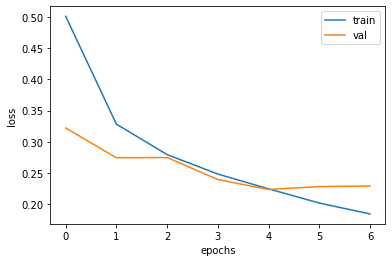

In [ ]:
#손실그래프를 그려보자
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
#EarlyStopping클래스에서 restore_best_weights를 True로 두었기 때문에 저장되어있다..
model.evaluate(val_scaled, val_target)
#나는 6번째 에포크랑 결과가 동일하다..

375/375 [==============================] - 1s 2ms/step - loss: 0.2232 - accuracy: 0.9172


[0.22319002449512482, 0.9171666502952576]

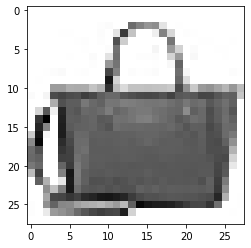

In [ ]:
#predict메서드를 이용해서 한번 예측을 만들어보자
#각 클래스일 확률을 모두 반환한다
#아까 합성곱-풀링층에 넣는다고 (28,28,1)로 크기를 바꿧으니까 다시 (28,28)로 바꿔야한다.

plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])  #슬라이싱 인덱스를 사용해서 전체차원을 유지하면된다
print(preds)

[[5.5559004e-12 9.0035918e-16 1.4580662e-12 1.8457646e-12 3.0125238e-10
  1.9077548e-12 2.5501812e-12 4.0731987e-11 1.0000000e+00 3.0832836e-16]]


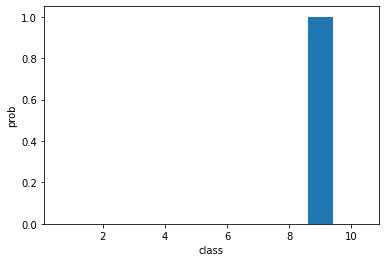

In [ ]:
#막대그래프로 함 보자..
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [ ]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
#테스트 세트도 스케일링해서 예측을 한번 해보자
#3차원 입력을 주어야함..
test_scaled = test_input.reshape(-1,28,28,1) / 255.0

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2489 - accuracy: 0.9105


[0.24888776242733002, 0.9104999899864197]

입력 -> 여러개의 합성곱-풀링층 -> 여러개의 은닉층(드롭아웃) -> 출력층...

합성곱 신경망은 주로 이미지를 다루기 때문에 각 층의 출력을 시각화하기 좋다..

#8.3 합성곱 신경망의 시각화

**가중치 시각화**

- 합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습한다
- 각 필터는 가중치와 절편을 가진다
- 절편은 시각적으로 의미는 없다
- 가중치는 입력이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 한다
- 중요한 부분의 가중치는 크게해야 입력과 곱해져서 큰 출력을 만든다..

-> 가중치는 시각적으로 한번 볼 수 있다..

**시각화 방법**

1) 가중치 자체를 출력해서 시각화한다.

2) 합성곱 층에서 출력된 특성 맵을 그려본다.

방법 1) 가중치 자체를 출력

In [ ]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [ ]:
model.layers
#추가했던 층의 정보..

In [ ]:
#첫번째 합성곱 층의 가중치를 조사해 보자..
conv = model.layers[0]
#conv = 첫번째 합성곱층..

#층의 가중치와 절편은 층의 weights속성에 저장되어있다..
#weights[0] : 가중치  /  weights[1] : 절편
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


커널의 갯수는 32, kernel_size=3으로 지정했고, 깊이가 흑백이미지라서 1이다

절편은 커널마다 하나씩 있으니까 32개이다

weights 속성은 텐서플로의 다차원 배열인 Tensor클래스의 객체이다..

-> numpy로 바꿔서 계산하자

In [ ]:
conv_weights = conv.weights[0].numpy()

#넘파이로 평균과 표준편차 계산
print(conv_weights.mean(), conv_weights.std())

# -> 첫번째 층의 가중치의 평균값은 0에 가깝고 표준편차는 0.27에 가깝다..

-0.038471423 0.2620116


In [ ]:
print(conv_weights.shape)

(3, 3, 1, 32)


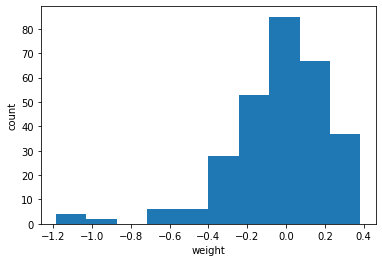

In [ ]:
# 평균과 표준편차에대한 히스토그램..
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))        
#히스토그램을 그리려면 1차원 배열로 줘야한다..
# reshape()를 이용해서 바꿧다

plt.xlabel('weight')
plt.ylabel('count')
plt.show()

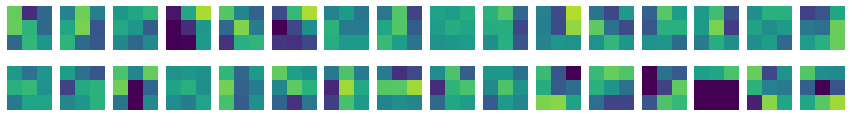

In [ ]:
# 가중치 출력.. 그림으로..
# conv_weights.shape = (3,3,1,32)
# 그래서 매개변수를 [:,:,0,인덱스]이렇게 준거임.. 3*3은 다 출력해야하고 깊이는 1이니까 인덱스를 0으로 줌..

fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

#원래 imshow()는 각 샘플 내에서만 비교해서 밝기를 보여주는거라서 두 개 이상의 샘플의 비교에는 의미가 없음..
#vmin, vmax를 지정하면 밝기의 절대치를 지정해서 잘 비교가 되도록 했다.

In [ ]:
#훈련하지 않은 가중치 만들기..
#빈 합성곱 신경망을 만들자..

no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [ ]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)
#제대로 같은 크기를 가지고 가중치(커널)가 생성됨..

(3, 3, 1, 32)


In [ ]:
#새로운 가중치의 평균은..?
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0014383106 0.07780636


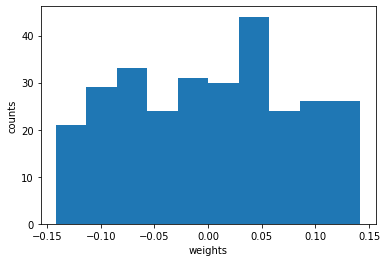

In [ ]:
#새로운거 히스토그램..
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('counts')
plt.show()

#가중치를 초기에 균등분포에서 랜덤하게 가져오기 때문에 이런 히스토그램이 나타남..

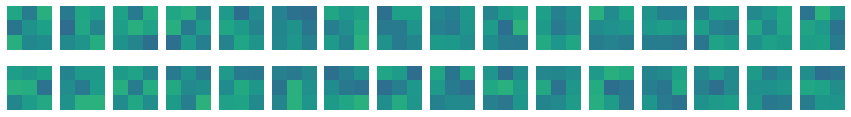

In [ ]:
#커널들을 출력해보자..
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin = -0.5, vmax = 0.5)
        axs[i,j].axis('off')
plt.show()

# 가중치가 훈련하기 전에는 밋밋하게 있다.
# 훈련되고나면 좀더 명확한데, 유용한 특성을 학습했다는 뜻이다..
# 밝은 부분이 높은 출력을 낸다

In [ ]:
#fig에는 존나 이상하네.. 이게 뭐지ㅋㅋ
print(fig)

Figure(1080x144)


방법 2) 합성곱 층에서 출력된 특성 맵을 그려보자

**함수형 API**

- 층을 함수처럼 생각한다
- 이전 층의 출력을 다음 층의 입력으로 생각하여 코딩한다
- 처음의 input도 케라스의 Input()메서드로 입력의 크기를 넣어준다

In [ ]:
"""
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

#층을 두개 생성.. 각 층에 대해서 입력과 출력을 함수의 입출력처럼 생각
"""

"\ndense1 = keras.layers.Dense(100, activation='sigmoid')\ndense2 = keras.layers.Dense(10, activation='softmax')\n\n#층을 두개 생성.. 각 층에 대해서 입력과 출력을 함수의 입출력처럼 생각\n"

In [ ]:
#앞에서는 Sequential()의 add()메서드를 이용해서 차례대로 코딩했다..
#하지만 함수형 API에서는 각 층의 입출력을 잘 전달해주기만 하면 된다.

"""
hidden = dense1(inputs)                     #dense1층에 첫 입력을 넣어서 출력을 hidden으로 저장한다
outputs = dense2(hidden)                    #첫 번째 층의 출력을 다시 두번째 dense2층의 입력으로 넣는다.
inputs = keras.Input(shape = (784,))        #InputLayer 클래스 객체를 별도로 제공하여 입력의 크기만 shape매개변수에 넣어준다

model = keras.Model(inputs, outputs)        #모델 클래스로 입력과 출력을 연결해주면 된다
"""

#요런 식으로 입출력을 연결해주고, 입력은 Input클래스를 이용하여 지정한다
#Sequential()클래스로 만들때는 InputLayer클래스를 자동으로 추가해 주지만 Model 클래스에서는 수동으로 해야한다
#입력층 역할을 해준다

'\nhidden = dense1(inputs)     #dense1층에 첫 입력을 넣어서 출력을 hidden으로 저장한다\noutputs = dense2(hidden)    #첫 번째 층의 출력을 다시 두번째 dense2층의 입력으로 넣는다.\ninputs = keras.Input(shape = (784,))        #InputLayer 클래스 객체를 별도로 제공하여 입력의 크기만 shape매개변수에 넣어준다\n\nmodel = keras.Model(inputs, outputs)        #모델 클래스로 입력과 출력을 연결해주면 된다\n'

함수형 API 사용이유!!

- 각 층의 입출력을 참조할 수 있어서
- 출력은 각층의 output속성에서 얻는다
- 입력은 input속성으로 참조 할 수 있다

In [ ]:
#모델의 입력 참조
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_3_input'), name='conv2d_3_input', description="created by layer 'conv2d_3_input'")


함수형 API를 이용하면 각 층의 입출력을 얻을 수 있기 때문에 몇개의 층을 연결하는 새로운 모델을 만들 수 있다

In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)
# 전체 모델의 입력과 첫번째 합성곱층의 출력을 conv_acti의 입출력으로 지정했다..
# 새로운 모델을 생성.. -> 이러면 특성맵을 그릴수 있게 된다!!

**특성 맵 시각화**

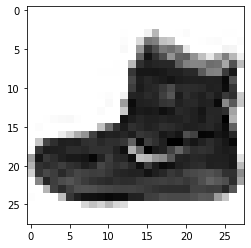

In [ ]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

predict()메서드는 항상 입력의 첫번째 차원이 배치차원(입력의 갯수)일 것으로 기대함

fit(), evaluate()메서드도 동일..

하나의 샘플을 전달하더라도 유지해야함

그래서 슬라이싱 연산자를 사용한다

In [ ]:
inputs = train_input[0:1].reshape(-1,28,28,1)/ 255.0        #첫번째 배치차원 유지를 위해 슬라이싱으로.. 크기를 (28,28,1)로 변경
feature_maps = conv_acti.predict(inputs)

In [ ]:
#예측의 크기를 출력..
print(feature_maps.shape)
# (배치차원, 크기, 크기, 깊이)
# 세임패딩이므로 크기가 동일

(1, 28, 28, 32)


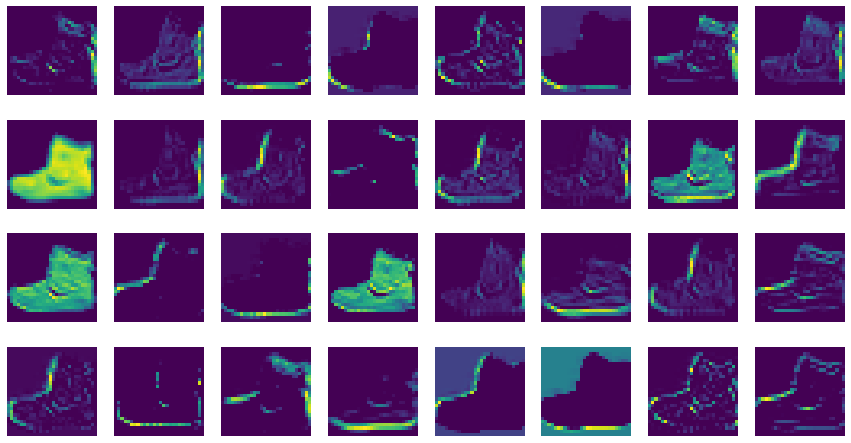

In [ ]:
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

위의 특성맵 분석

- 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여줌
- 가중치(커널)의 그림에서 밝은 부분이 강하게 활성화되어 나타난다
- **가중치의 밝은 부분의 모양이 많을수록 강하게 활성화 된다**

In [ ]:
#두 번째 합성곱 층의 특성 맵도 같은 방식으로 확인가능..

conv2_acti = keras.Model(model.input, model.layers[2].output)
#의문.. 꼭 첫번째 출력만 넣어야 할까..? 첫번째 풀링층의 출력을 입력으로 넣으면 두번째 합성곱층의 가중치만을 그릴수 있지 않을까?
#두번째 층이 의미를 보려면 첫번째 합성곱 층을 통과한 결과를 받아야하므로 두번째 합성곱층만의 가중치는 의미가 없다
#그리고 받는법도 모르겟다..

inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)

In [ ]:
"""
풀링층의 출력을 입력으로 삼고, 두번째 합성곱 층의 출력을 출력으로 삼는 새로운 모델을 만들자
"""
"""
conv3_acti = keras.Model(model.layers[2].input, model.layers[2].output)
feature_maps3 = conv3_acti.predict(inputs)
이건 안되네..
"""
print(model.input)
print(model.layers[1].output)
print(model.layers[2].input)
# 객체가 달라서 그런가..

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_3_input'), name='conv2d_3_input', description="created by layer 'conv2d_3_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 32), dtype=tf.float32, name=None), name='max_pooling2d_2/MaxPool:0', description="created by layer 'max_pooling2d_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 32), dtype=tf.float32, name=None), name='max_pooling2d_2/MaxPool:0', description="created by layer 'max_pooling2d_2'")


In [ ]:
#크기를 확인해보자..
print(feature_maps.shape)
#(배치차원, 풀링 후 크기, 풀링 후 크기, 특성맵 깊이)

(1, 14, 14, 64)


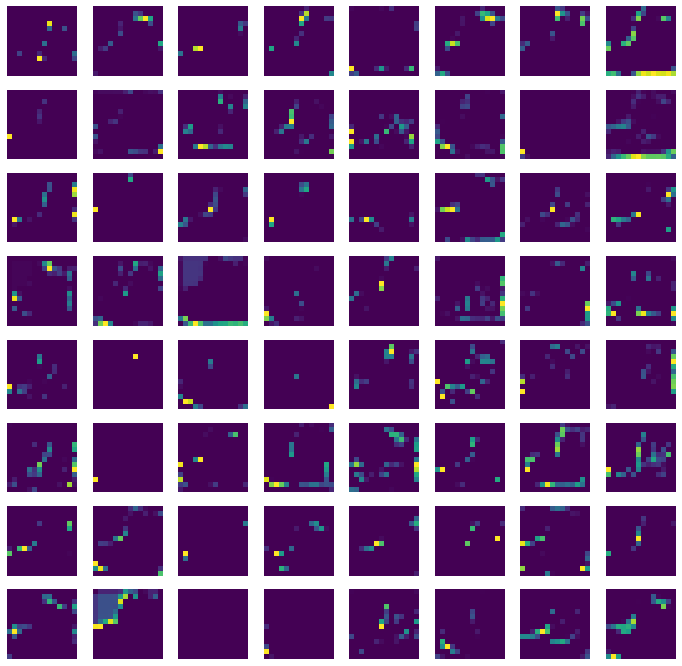

In [ ]:
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

시각적으로 이해하기 힘들다..

- 두번째 합성곱층의 필터 크기는 (3,3,32)이다.

- 앞의 층의 특성맵 32개가 쌓여있다. shape은 (14,14,32)이다

- 두번째 합성곱층의 필터(도장)로 쭉 찍어뿐다.

- 하나의 도장으로 앞의 모든 특성맵을 찍는 셈이다  ->  어느 부분을 감지하는지 직관적인 이해가 어렵다!

이는 합성곱 층이 많이 쌓일수록 심해진다.

합성곱 신경망의 앞부분 : 이미지의 시각적인 정보를 감지

합성곱 신경망의 뒷부분 : 앞의 시각적인 정보를 가지고 추상적인 정보를 학습함..

--> 10개의 클래스를 찾아낼 수 있는 이유!!

**정리**

가중치 시각화

- 합성곱 층의 가중치를 이미지로 출력하는 것

특성 맵 시각화

- 합성곱 층의 활성화 출력을 이미지로 그리는 것

함수형 API

- 케라스에서 신경망 모델을 만드는 방법 중 하나
- 입출력을 서로서로 연결 짓는다
- 마지막에 Model 클래스에 모델의 입력과 출력을 지정한다..
- 입력은 Input(), 출력은 Output()